In [2]:
import geopandas as gpd
import pygee

# Make Shapefiles

In [ ]:
from shapely.geometry import Point
import pandas as pd

In [27]:
df = pd.read_csv("../../da_gan/data/school_coords.csv")
df['geometry'] = [Point(xy) for xy in zip(df.longitude, df.latitude)] 
df = gpd.GeoDataFrame(df, geometry = 'geometry')
df.to_file("./school_shps/phl.shp")
df.head()

/opt/conda/envs/caoe/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


,Unnamed: 0,school_id,latitude,longitude,geometry
0,0,104408,15.766944,121.558333,POINT (121.55833 15.76694)
1,1,104409,15.760000,121.564500,POINT (121.56450 15.76000)
2,2,104410,15.747778,121.509722,POINT (121.50972 15.74778)
3,3,104411,15.752500,121.576667,POINT (121.57667 15.75250)
4,4,104412,15.741944,121.556944,POINT (121.55694 15.74194)


In [33]:
df = pd.read_csv("../../da_gan/data/pri-performing-all.csv")
df['geometry'] = [Point(xy) for xy in zip(df.LONGITUDE, df.LATITUDE)] 
df = gpd.GeoDataFrame(df, geometry = 'geometry')
df.to_file("./school_shps/tza.shp")
df.head()

/opt/conda/envs/caoe/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/tmp/ipykernel_25102/2798692816.py:4: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  df.to_file("./school_shps/tza.shp")


,CODE,NAME,REGION,DISTRICT,WARD,OWNERSHIP,LONGITUDE,LATITUDE,PASS_RATE,AVG_MARK,CHANGE_PREVIOUS_YEAR,RANK,YEAR_OF_RESULT,PUPIL_TEACHER_RATIO,LOCATION_IS_WARD,LOCATION_IS_DISTRICT,LOCATION_IS_GEOCODER,LOCATION_IS_APPROXIMATE,geometry
0,PS0101-001,BANGATA PR. SCHOOL,ARUSHA,ARUSHA,BANGATA,GOVERNMENT,36.744000,-3.338421,2.50,66.78,-78.25,12839,2012,NaN,0,0,0,0,POINT (36.74400 -3.33842)
1,PS0101-001,BANGATA PR. SCHOOL,ARUSHA,ARUSHA,BANGATA,GOVERNMENT,36.744000,-3.338421,29.09,86.24,19.46,11728,2013,NaN,0,0,0,0,POINT (36.74400 -3.33842)
2,PS0101-001,BANGATA PR. SCHOOL,ARUSHA,ARUSHA,BANGATA,GOVERNMENT,36.744000,-3.338421,51.52,99.29,13.05,9426,2014,25.0,0,0,0,0,POINT (36.74400 -3.33842)
3,PS0101-003,BWAWANI PR. SCHOOL,ARUSHA,ARUSHA,BWAWANI,GOVERNMENT,36.844783,-3.607895,10.00,70.03,-23.08,11871,2012,NaN,0,0,0,0,POINT (36.84478 -3.60789)
4,PS0101-003,BWAWANI PR. SCHOOL,ARUSHA,ARUSHA,BWAWANI,GOVERNMENT,36.844783,-3.607895,11.11,77.36,7.33,13835,2013,NaN,0,0,0,0,POINT (36.84478 -3.60789)


In [37]:
df = pd.read_csv("../../da_gan/data/mex_for_gan.csv")
df['geometry'] = [Point(xy) for xy in zip(df.Longitude, df.Latitude)] 
df = gpd.GeoDataFrame(df, geometry = 'geometry')
df.to_file("./school_shps/mex.shp")
df.head()

/opt/conda/envs/caoe/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/tmp/ipykernel_25102/1554722182.py:4: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  df.to_file("./school_shps/mex.shp")


,Unnamed: 0,SchoolID,total_score,Latitude,Longitude,geometry
0,0,01DBH0004I,33.684371,21.879081,-102.254873,POINT (-102.25487 21.87908)
1,1,01DBH0005H,38.427961,21.879081,-102.254873,POINT (-102.25487 21.87908)
2,2,01DBP0001U,90.972222,21.899474,-102.272077,POINT (-102.27208 21.89947)
3,4,01DBP0002T,58.224969,21.879113,-102.254506,POINT (-102.25451 21.87911)
4,6,01DCM0001W,39.884005,21.890421,-102.250565,POINT (-102.25056 21.89042)


# Clean LC Data

In [93]:
lc_map = {  1: "Evergreen needleleaf forests",
            2: "Evergreen broadleaf forests",
            3: "Deciduous needleleaf forests",
            4: "Deciduous broadleaf forests",
            5: "Mixed forests",
            6: "Closed shrublands",
            7: "Open shrublands",
            8: "Woody savannas",
            9: "Savannas",
            10: "Grasslands",
            11: "Permanent wetlands",
            12: "Croplands",
            13: "Urban and built-up",
            14: "Cropland/natural vegetation mosaics",
            15: "Snow and ice",
            16: "Barren",
            17: "Water bodies"
         }

In [94]:
df_phl = pd.read_csv("./zonal_stats/phl_modis.csv")
df_phl["LC_Type1"] = df_phl["LC_Type1"].astype(int)
df_phl["LC_Type1_name"] = df_phl["LC_Type1"].map(lc_map)
df_phl = df_phl[["school_id", "LC_Type1", "LC_Type1_name", "latitude",  "longitude"]]
df_phl.head()

,school_id,LC_Type1,LC_Type1_name,latitude,longitude
0,105970,12,Croplands,14.933336,120.500000
1,159516,14,Cropland/natural vegetation mosaics,14.933214,120.500000
2,105768,13,Urban and built-up,15.640054,120.890625
3,108556,9,Savannas,14.861095,121.000000
4,108565,14,Cropland/natural vegetation mosaics,14.833882,121.000000


In [95]:
df_mex = pd.read_csv("./zonal_stats/mex_modis.csv")
df_mex["LC_Type1"] = df_mex["LC_Type1"].astype(int)
df_mex["LC_Type1_name"] = df_mex["LC_Type1"].map(lc_map)
df_mex = df_mex[["SchoolID", "LC_Type1", "LC_Type1_name", "Latitude",  "Longitude"]]
df_mex = df_mex.rename(columns = {"SchoolID": "school_id", "Latitude": "latitude", "Longitude": "longitude"})
df_mex.head()

,school_id,LC_Type1,LC_Type1_name,latitude,longitude
0,15EES1123H,12,Croplands,19.5081,100.0
1,15ETK0098S,5,Mixed forests,19.7750,-100.0
2,15ETK0183P,9,Savannas,18.7480,-100.0
3,15ETK0290Y,12,Croplands,19.5080,-100.0
4,32ETK0043F,12,Croplands,22.9523,-104.0


In [96]:
df_tan = pd.read_csv("./zonal_stats/tza_modis.csv")
df_tan["LC_Type1"] = df_tan["LC_Type1"].astype(int)
df_tan["LC_Type1_name"] = df_tan["LC_Type1"].map(lc_map)
df_tan = df_tan[["CODE", "LC_Type1", "LC_Type1_name", "LATITUDE",  "LONGITUDE"]]
df_tan = df_tan.rename(columns = {"CODE": "school_id", "LATITUDE": "latitude", "LONGITUDE": "longitude"})
df_tan.head()

,school_id,LC_Type1,LC_Type1_name,latitude,longitude
0,PS0701-004,10,Grasslands,-3.422214,37.224620
1,PS0701-004,10,Grasslands,-3.422214,37.224620
2,PS0701-004,10,Grasslands,-3.422214,37.224620
3,PS0701-113,12,Croplands,-3.374026,37.234134
4,PS0701-113,12,Croplands,-3.374026,37.234134


In [97]:
df_phl["LC_Type1_name"].value_counts()

Urban and built-up                     1535
Croplands                              1273
Woody savannas                          818
Savannas                                745
Cropland/natural vegetation mosaics     581
Grasslands                              338
Evergreen broadleaf forests             284
Permanent wetlands                      177
Water bodies                            122
Barren                                    1
Name: LC_Type1_name, dtype: int64

In [98]:
df_mex["LC_Type1_name"].value_counts()

Urban and built-up                     14126
Croplands                               6435
Savannas                                6155
Grasslands                              5914
Woody savannas                          5720
Open shrublands                         1793
Cropland/natural vegetation mosaics     1510
Evergreen broadleaf forests             1307
Deciduous broadleaf forests              290
Water bodies                             206
Mixed forests                             92
Barren                                    65
Permanent wetlands                        55
Evergreen needleleaf forests               2
Name: LC_Type1_name, dtype: int64

In [99]:
df_tan["LC_Type1_name"].value_counts()

Grasslands                             22508
Savannas                               12773
Urban and built-up                      2512
Croplands                               1957
Woody savannas                           881
Evergreen broadleaf forests              599
Cropland/natural vegetation mosaics      351
Deciduous broadleaf forests              130
Permanent wetlands                        91
Mixed forests                             81
Water bodies                              46
Open shrublands                           29
Barren                                     3
Closed shrublands                          3
Name: LC_Type1_name, dtype: int64

In [115]:
remap = {"Evergreen broadleaf forests": "Forests",
         "Deciduous broadleaf forests": "Forests",
         "Mixed forests": "Forests",
         "Evergreen needleleaf forests": "Forests",
         "Barren": "Savannas",
         "Closed shrublands": "Savannas",
         "Water bodies": "Waterbodies & Wetlands",
         "Permanent wetlands": "Waterbodies & Wetlands",
         "Cropland/natural vegetation mosaics": "Croplands",
         "Open shrublands": "Savannas",
         "Woody savannas": "Savannas",}

In [116]:
adm0 = pd.concat([df_phl, df_mex, df_tan])#["LC_Type1_name"].value_counts()
print(adm0.shape)
subset = adm0[adm0["LC_Type1_name"].isin(remap.keys())]
subset["LC_Type1_name"] = subset["LC_Type1_name"].map(remap)
adm0 = adm0[~adm0["LC_Type1_name"].isin(remap.keys())].append(subset)
adm0
# adm0["LC_Type1_name"].value_counts()

(91508, 5)


/tmp/ipykernel_25102/1235184356.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset["LC_Type1_name"] = subset["LC_Type1_name"].map(remap)
/tmp/ipykernel_25102/1235184356.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  adm0 = adm0[~adm0["LC_Type1_name"].isin(remap.keys())].append(subset)


,school_id,LC_Type1,LC_Type1_name,latitude,longitude
0,105970,12,Croplands,14.933336,120.500000
2,105768,13,Urban and built-up,15.640054,120.890625
3,108556,9,Savannas,14.861095,121.000000
5,136571,13,Urban and built-up,14.645669,121.062500
8,105190,12,Croplands,15.498674,120.833799
...,...,...,...,...,...
41301,PS1704-035,14,Croplands,-3.693569,33.331530
41946,PS2603-017,14,Croplands,-8.841169,34.800497
41947,PS2603-017,14,Croplands,-8.841169,34.800497
41962,PS2603-012,7,Savannas,-8.964059,34.765897


In [130]:
adm0["LC_Type1_name"].value_counts()

Savannas                  28986
Grasslands                28760
Urban and built-up        18173
Croplands                 12107
Forests                    2785
Waterbodies & Wetlands      697
Name: LC_Type1_name, dtype: int64

In [157]:
adm0[adm0["LC_Type1_name"] == "Waterbodies & Wetlands"].tail(15)
# adm0

,school_id,LC_Type1,LC_Type1_name,latitude,longitude
35049,PS1306-136,11,Waterbodies & Wetlands,-2.329816,32.351042
35050,PS1306-136,11,Waterbodies & Wetlands,-2.329816,32.351042
35051,PS1306-136,11,Waterbodies & Wetlands,-2.329816,32.351042
35104,PS1306-073,17,Waterbodies & Wetlands,-2.197575,32.241102
35105,PS1306-073,17,Waterbodies & Wetlands,-2.197575,32.241102
35106,PS1306-073,17,Waterbodies & Wetlands,-2.197575,32.241102
35107,PS1306-147,11,Waterbodies & Wetlands,-2.170313,32.147111
35108,PS1306-147,11,Waterbodies & Wetlands,-2.170313,32.147111
35109,PS1306-147,11,Waterbodies & Wetlands,-2.170313,32.147111
36163,PS2105-015,17,Waterbodies & Wetlands,-3.676663,37.390441


In [349]:
adm0.to_csv("./zonal_stats/all_modis.csv", index = False)

# Make Imagery Grids

In [172]:
from PIL import Image
import numpy as np
import os

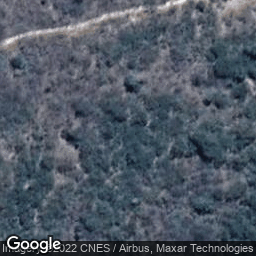

In [138]:
# Savannah
Image.open("../dimagery/tan/z18_PS2603-012.png")

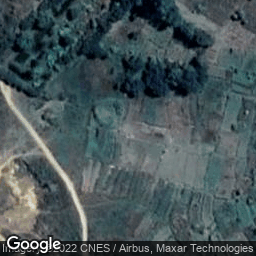

In [135]:
# Grassland
Image.open("../dimagery/tan/z18_PS2603-018.png")

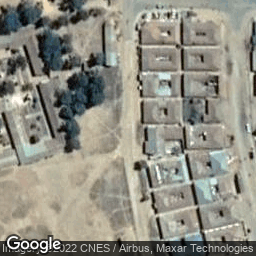

In [141]:
# Urban and built-up
Image.open("../dimagery/tan/z18_PS2603-001.png")

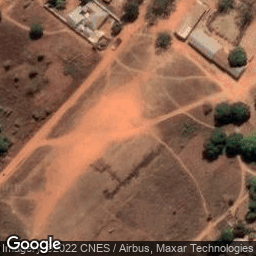

In [154]:
# Cropland
Image.open("../dimagery/tan/z18_PS1604-045.png")

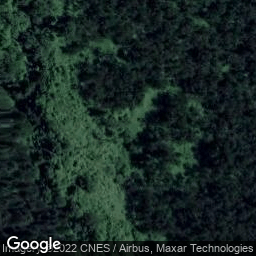

In [156]:
# PS2105-052
Image.open("../dimagery/tan/z18_PS2105-052.png")

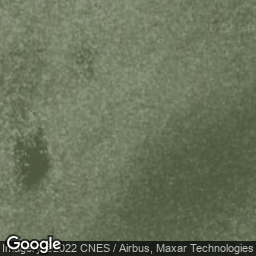

In [163]:
# PS1306-147
# This coordinate is of center from the school, but it is indeed near a body of water
Image.open("../dimagery/tan/z18_PS2105-015.png")

In [435]:
ims = ["../dimagery/tan/z18_PS2603-012.png", 
       "../dimagery/tan/z18_PS2603-018.png",
       "../dimagery/tan/z18_PS2603-001.png",
       "../dimagery/tan/z18_PS1604-045.png",
       "../dimagery/tan/z18_PS2105-052.png",
       "../dimagery/tan/z18_PS2105-015.png"]

ims = [np.array(Image.open(i).convert("RGB")) for i in ims]

im_names = ['Savannas', 'Grasslands', 'Urban and built-up', 'Croplands', 'Forests', 'Waterbodies & Wetlands']

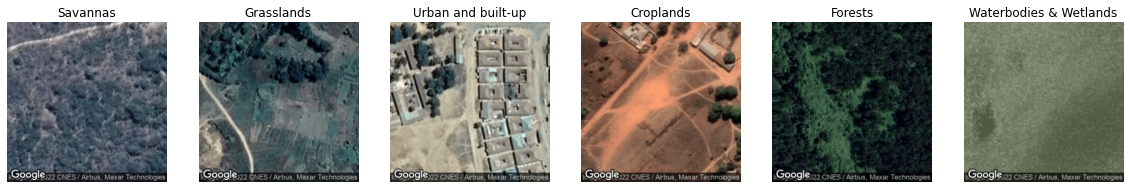

In [438]:
import matplotlib.pyplot as plt
import matplotlib as mpl


mpl.rcParams['axes.spines.left'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = False


f, ax = plt.subplots(1,6, figsize=(20, 10))
# f.
for i in range(6):
    ax[i].imshow(ims[i])
    ax[i].set_title(im_names[i])
    ax[i].get_yaxis().set_visible(False)
    ax[i].get_xaxis().set_visible(False)
#     ax[i].spines[['left', 'right', 'top', 'bottom']].set_visible(False)
# plt.show() # or display.display(plt.gcf()) if you prefer

plt.savefig("./figures/land_cover_classes_images.png")

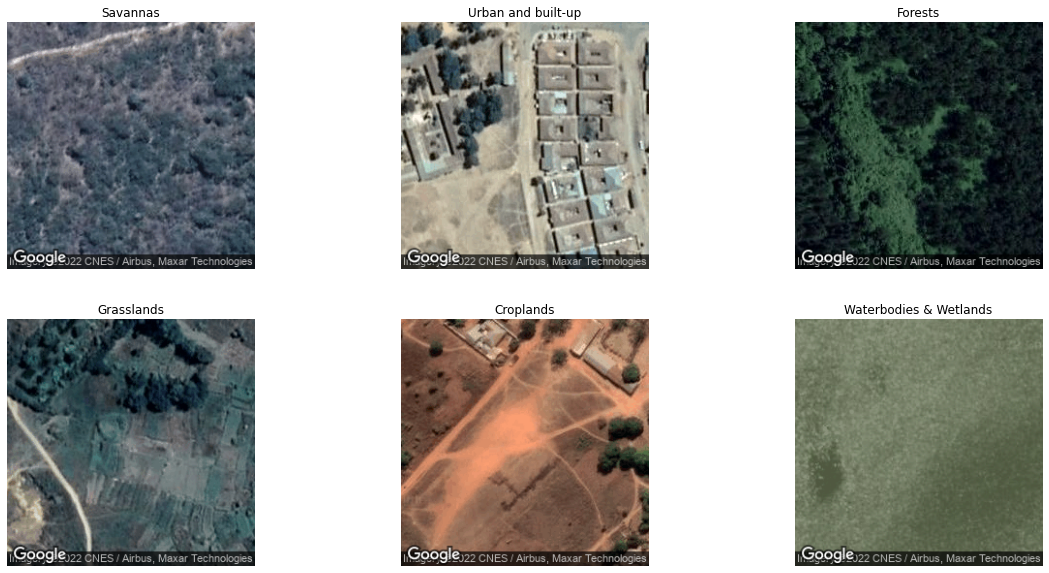

In [447]:
import matplotlib.pyplot as plt
import matplotlib as mpl


mpl.rcParams['axes.spines.left'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = False


f, ax = plt.subplots(2, 3, figsize=(20, 10))

c = 0
for col in range(3):
    for row in range(2):
        ax[row, col].imshow(ims[c])
        ax[row, col].set_title(im_names[c])
        ax[row, col].get_yaxis().set_visible(False)
        ax[row, col].get_xaxis().set_visible(False)
        c += 1
# plt.show() # or display.display(plt.gcf()) if you prefer

plt.savefig("./figures/land_cover_classes_images_grid.png")

In [199]:
adm0["school_id"] = adm0["school_id"].astype(str)

# Make Violin Plots

In [ ]:
def mergeDictionary(dict_1, dict_2):
    dict_3 = {**dict_1, **dict_2}
    for key, value in dict_3.items():
        if key in dict_1 and key in dict_2:
            dict_3[key] = value + dict_1[key]
    return dict_3

In [343]:
class DistStore():
    
    def __init__(self, class_list):
        
        self.class_list = class_list
        self.class_dict = {self.class_list[i]:i for i in range(len(self.class_list))}
        self.dist_store = {i:0 for i in range(len(self.class_list))}
        print(self.class_dict, self.dist_store)
        
    def update_vals(self, lc, vals):
            
        try:
            
            class_id = self.class_dict[lc]

            if self.dist_store[class_id] == 0:
                self.dist_store[class_id] = vals
            else:
                self.dist_store[class_id] = mergeDictionary(self.dist_store[class_id], vals)
            
        except Exception as e:

            print(e, lc)
            
        
#         print(lc, vals)
        
        
        
DistStore(im_names)

{'Savannas': 0, 'Grasslands': 1, 'Urban and built-up': 2, 'Croplands': 3, 'Forests': 4, 'Waterbodies & Wetlands': 5} {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0}


In [344]:
c = 0

def calc_dists(dist_storer, channel):
    
    for country in os.listdir("../dimagery/"):
        for school in os.listdir("../dimagery/" + country):
            school_id = school.split("_")[1].split(".")[0]
            lc = adm0[adm0["school_id"] == school_id].drop_duplicates(subset = "school_id")["LC_Type1_name"].squeeze()
            im = np.array(Image.open("../dimagery/" + country + "/" + school).convert("RGB"))
            b_vals = im[:, :, channel].flatten()
            bunique, bcounts = np.unique(b_vals, return_counts=True)
            dist_storer.update_vals(lc, dict(zip(bunique, bcounts)))
    
    return dist_storer


In [345]:
# r_plot_vals.fillna(0)

In [346]:
r_store = calc_dists(DistStore(im_names), 0)

{'Savannas': 0, 'Grasslands': 1, 'Urban and built-up': 2, 'Croplands': 3, 'Forests': 4, 'Waterbodies & Wetlands': 5} {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0}
unhashable type: 'Series' Series([], Name: LC_Type1_name, dtype: object)
unhashable type: 'Series' Series([], Name: LC_Type1_name, dtype: object)


/opt/conda/envs/caoe/lib/python3.9/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


unhashable type: 'Series' Series([], Name: LC_Type1_name, dtype: object)


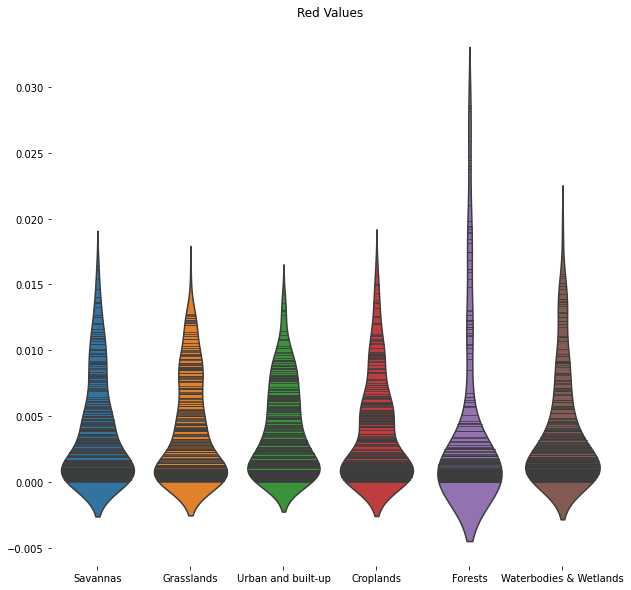

In [370]:
plt.figure(figsize = (10, 10))

r_plot_vals = [list(r_store.dist_store[i].values()) for i in range(0, 6)]
r_plot_vals = pd.DataFrame(r_plot_vals).T.fillna(0)
r_plot_vals.columns = im_names

for column in r_plot_vals.columns:
    r_plot_vals[column] = r_plot_vals[column] / r_plot_vals[column].sum()#.abs().max()

sns.violinplot(data = r_plot_vals, inner = "stick").set(title = "Red Values")
plt.savefig("./figures/red_values.png")

In [372]:
r_plot_vals.to_csv("./dist_tables/r_plot_vals.csv", index = False)

In [371]:
g_store = calc_dists(DistStore(im_names), 1)

{'Savannas': 0, 'Grasslands': 1, 'Urban and built-up': 2, 'Croplands': 3, 'Forests': 4, 'Waterbodies & Wetlands': 5} {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0}
unhashable type: 'Series' Series([], Name: LC_Type1_name, dtype: object)
unhashable type: 'Series' Series([], Name: LC_Type1_name, dtype: object)


/opt/conda/envs/caoe/lib/python3.9/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


unhashable type: 'Series' Series([], Name: LC_Type1_name, dtype: object)


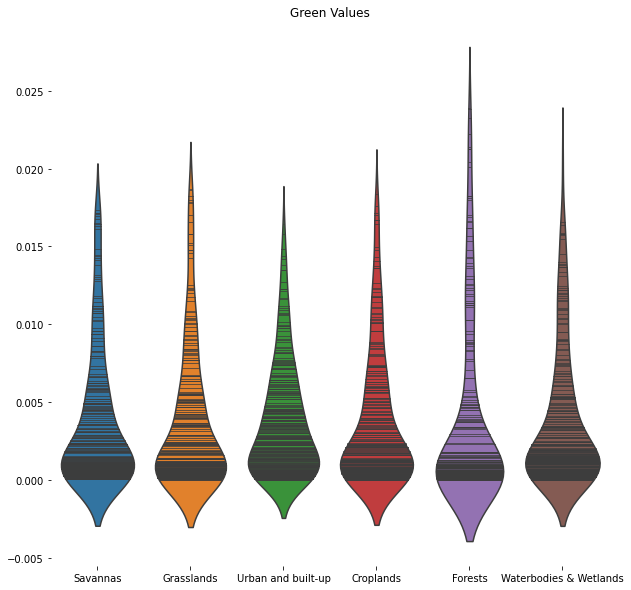

In [384]:
plt.figure(figsize = (10, 10))

g_plot_vals = [list(g_store.dist_store[i].values()) for i in range(0, 6)]
g_plot_vals = pd.DataFrame(g_plot_vals).T.fillna(0)
g_plot_vals.columns = im_names

g_plot_vals

for column in g_plot_vals.columns:
    g_plot_vals[column] = g_plot_vals[column] / g_plot_vals[column].sum()#.abs().max()

# g_plot_vals
    
sns.violinplot(data = g_plot_vals, inner = "stick").set(title = "Green Values")
plt.savefig("./figures/green_values.png")

In [385]:
g_plot_vals.to_csv("./dist_tables/g_plot_vals.csv", index = False)

In [386]:
b_store = calc_dists(DistStore(im_names), 2)

{'Savannas': 0, 'Grasslands': 1, 'Urban and built-up': 2, 'Croplands': 3, 'Forests': 4, 'Waterbodies & Wetlands': 5} {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0}
unhashable type: 'Series' Series([], Name: LC_Type1_name, dtype: object)
unhashable type: 'Series' Series([], Name: LC_Type1_name, dtype: object)


/opt/conda/envs/caoe/lib/python3.9/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


unhashable type: 'Series' Series([], Name: LC_Type1_name, dtype: object)


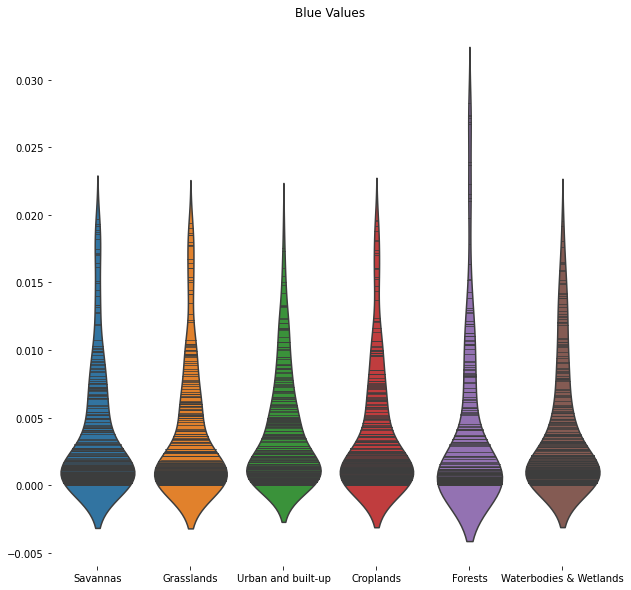

In [388]:
plt.figure(figsize = (10, 10))

b_plot_vals = [list(b_store.dist_store[i].values()) for i in range(0, 6)]
b_plot_vals = pd.DataFrame(b_plot_vals).T.fillna(0)
b_plot_vals.columns = im_names

for column in g_plot_vals.columns:
    b_plot_vals[column] = b_plot_vals[column] / b_plot_vals[column].sum()#.abs().max()

sns.violinplot(data = b_plot_vals, inner = "stick").set(title = "Blue Values")
plt.savefig("./figures/blue_values.png")

In [389]:
b_plot_vals.to_csv("./dist_tables/b_plot_vals.csv", index = False)

# Split along geographic lines

In [411]:
c = 0

def calc_dists(dist_storer, channel):
    
    for country in os.listdir("../dimagery/"):
        print(country)
        for school in os.listdir("../dimagery/" + country):
            school_id = school.split("_")[1].split(".")[0]
            lc = adm0[adm0["school_id"] == school_id].drop_duplicates(subset = "school_id")["LC_Type1_name"].squeeze()
            im = np.array(Image.open("../dimagery/" + country + "/" + school).convert("RGB"))
            b_vals = im[:, :, channel].flatten()
            bunique, bcounts = np.unique(b_vals, return_counts=True)
            dist_storer.update_vals(country, dict(zip(bunique, bcounts)))
    
    return dist_storer


In [412]:
country_store = calc_dists(DistStore(["mex", "phl", "tan"]), 0)
country_store

{'mex': 0, 'phl': 1, 'tan': 2} {0: 0, 1: 0, 2: 0}
mex
tan


/opt/conda/envs/caoe/lib/python3.9/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


phl


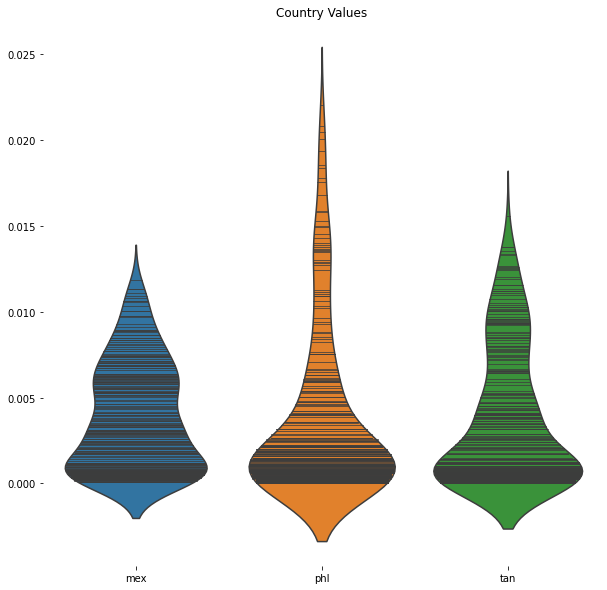

In [414]:
plt.figure(figsize = (10, 10))

c_plot_vals = [list(country_store.dist_store[i].values()) for i in range(0, 3)]
c_plot_vals = pd.DataFrame(c_plot_vals).T.fillna(0)
c_plot_vals.columns = ["mex", "phl", "tan"]

for column in c_plot_vals.columns:
    c_plot_vals[column] = c_plot_vals[column] / c_plot_vals[column].sum()#.abs().max()

sns.violinplot(data = c_plot_vals, inner = "stick").set(title = "Country Values")
plt.savefig("./figures/country_values.png")

# Data

In [417]:
dta = pd.read_csv("../../da_gan/data/data_for_gan.csv")
# dta = pd.DataFrame(dta.groupby(["country"]))
dta.head()

,school_id,score,scaled_score,country,binary
0,01DBH0004I,33.684371,33.358985,mex,0
1,01DBH0005H,38.427961,38.128500,mex,0
2,01DBP0001U,90.972222,90.959937,mex,1
3,01DBP0002T,58.224969,58.033707,mex,1
4,01DCM0001W,39.884005,39.592502,mex,0


In [422]:
mex_vals = dta[dta["country"] == "mex"]["scaled_score"].values
phl_vals = dta[dta["country"] == "phl"]["scaled_score"].values
tan_vals = dta[dta["country"] == "tan"]["scaled_score"].values

# mex_vals

(array([4663., 4053., 4353., 4345., 4478., 4387., 4327., 4326., 4279.,
        4439.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

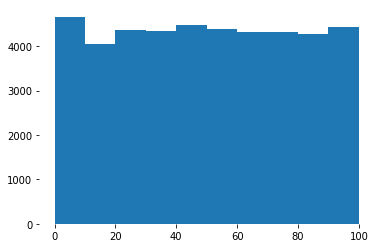

In [424]:
plt.hist(mex_vals)

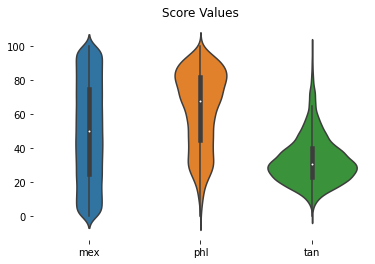

In [434]:
ax = sns.violinplot(data = [mex_vals, phl_vals, tan_vals])#
ax.set_xticklabels(["mex", "phl", "tan"])
ax.set_title("Score Values")
plt.savefig("./figures/score_values.png")

In [419]:
dta.pivot(columns = 'country', values = 'scaled_score')

country,mex,phl,tan
0,33.358985,NaN,NaN
1,38.128500,NaN,NaN
2,90.959937,NaN,NaN
3,58.033707,NaN,NaN
4,39.592502,NaN,NaN
...,...,...,...
65034,NaN,58.112392,NaN
65035,NaN,24.063401,NaN
65036,NaN,44.351585,NaN
65037,NaN,48.429395,NaN
